### Goal :-
Use sales data analysis to find patterns, best-selling items, and revenue indicators to help in business decision-
making.

### Data Prepration and Cleaning

In [1]:
### --------------------------
### Import necessary libraries
### --------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
###-----------------
### Loading the data
###-----------------

data = pd.read_excel("ECOMM DATA.xlsx")

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [18]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Year',
       'Month', 'Quarter', 'Profitability'],
      dtype='object')

In [4]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Quarter'] = data['Order Date'].dt.quarter

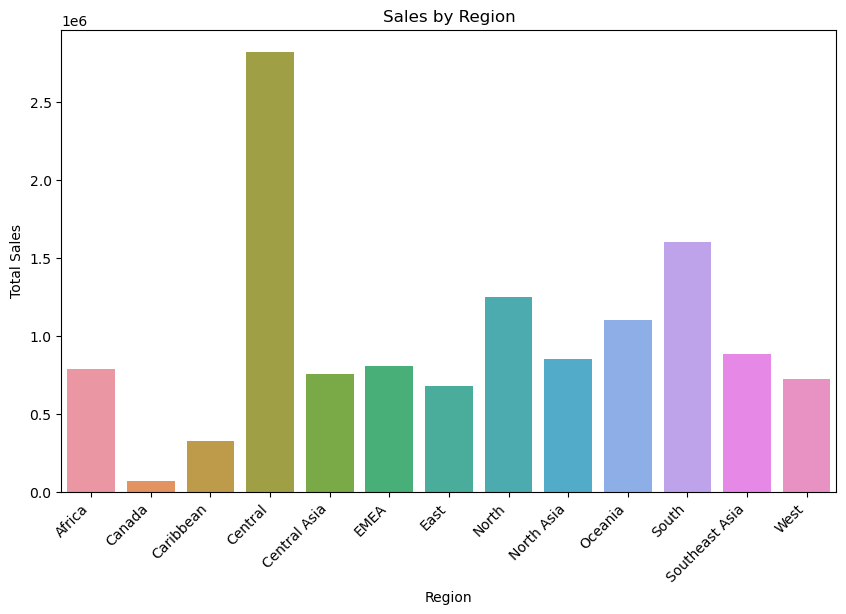

In [6]:
# Region-wise Sales Analysis (Optional)

# Group by Region and Segment

region_sales = data.groupby(['Region'])['Sales'].sum().reset_index()

# Plot region-wise sales

plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.xticks(rotation=45, ha='right')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [7]:
# Label encoding for categorical variables
label_encoders = {}
for column in ['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [8]:
# Drop irrelevant columns or columns with too many unique categories, including original date columns
data = data.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID', 'Order Date', 'Ship Date'])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       51290 non-null  int64  
 1   Segment         51290 non-null  int64  
 2   City            51290 non-null  int64  
 3   State           51290 non-null  int64  
 4   Country         51290 non-null  int64  
 5   Market          51290 non-null  int64  
 6   Region          51290 non-null  int64  
 7   Category        51290 non-null  int64  
 8   Sub-Category    51290 non-null  int64  
 9   Product Name    51290 non-null  object 
 10  Sales           51290 non-null  float64
 11  Quantity        51290 non-null  int64  
 12  Discount        51290 non-null  float64
 13  Profit          51290 non-null  float64
 14  Shipping Cost   51290 non-null  float64
 15  Order Priority  51290 non-null  int64  
 16  Year            51290 non-null  int32  
 17  Month           51290 non-null 

In [10]:
# 1. Compute Total Sales

total_sales = data['Sales'].sum()
print(f"Total Sales: ${total_sales:.2f}")

Total Sales: $12642501.91


In [11]:
# 2. Sales Trends Over Time

monthly_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [12]:
monthly_sales

,Year,Month,Sales
0,2011,1,98898.48886
1,2011,2,91152.15698
2,2011,3,145729.36736
3,2011,4,116915.76418
4,2011,5,146747.83610
5,2011,6,215207.38022
6,2011,7,115510.41912
7,2011,8,207581.49122
8,2011,9,290214.45534
9,2011,10,199071.26404


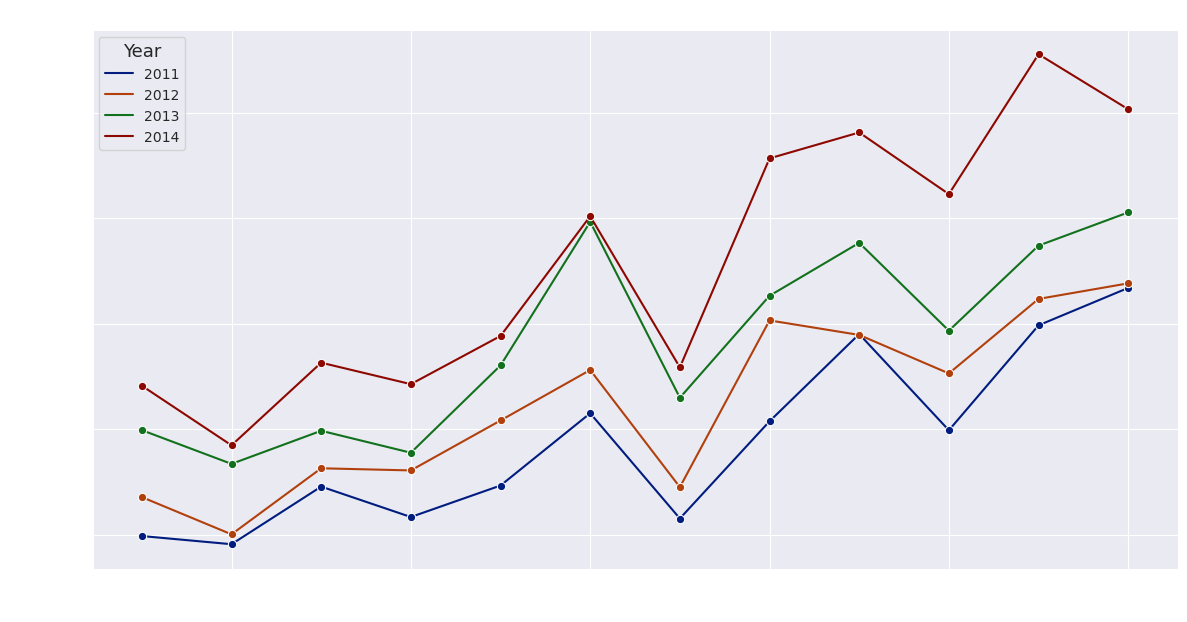

In [13]:
# Set a dark background style
sns.set_style("darkgrid")  # or 'whitegrid' for slightly lighter options
plt.figure(figsize=(14, 7))
palette = sns.color_palette("dark", as_cmap=False)

sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o', palette=palette)
plt.title('Monthly Sales Trend', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('Total Sales', color='white')
plt.legend(title='Year', title_fontsize='13', fontsize='10')
plt.xticks(color='white')
plt.yticks(color='white')

plt.show()


In [14]:
# 3. Determine Best-Selling Products

top_products = data.groupby('Product Name').agg({'Sales': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=False).head(10)


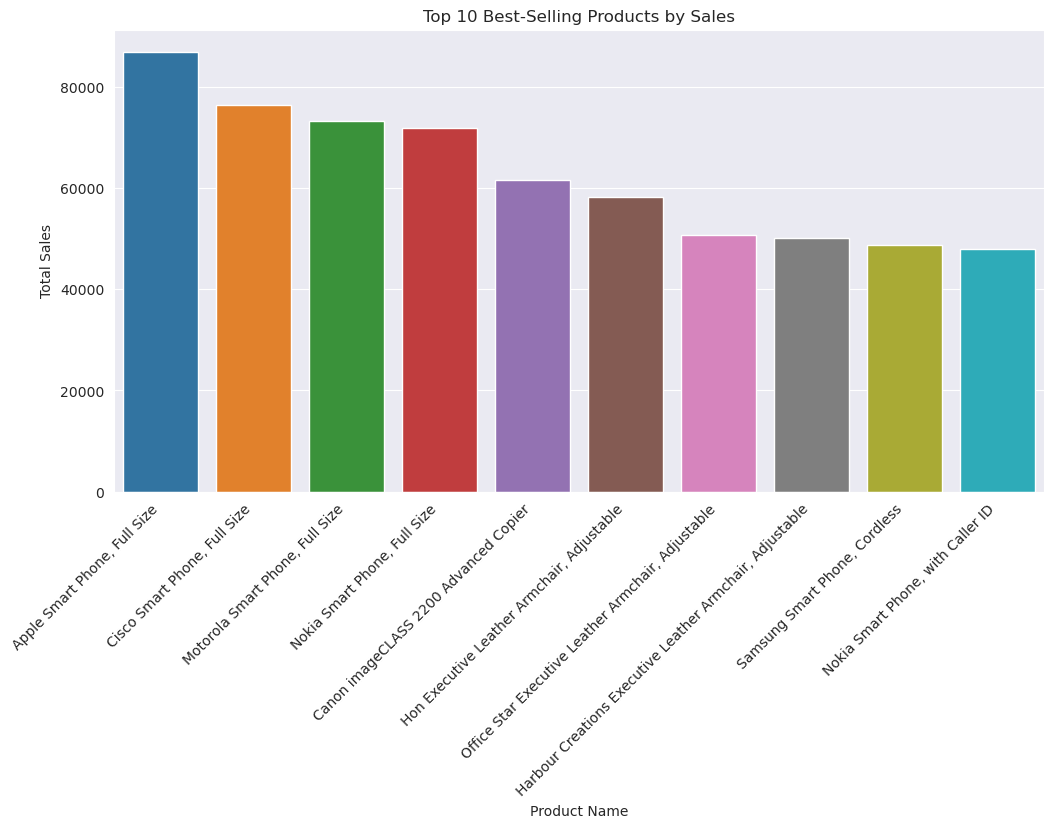

In [15]:
# Plot top products by sales
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x=top_products.index, y='Sales')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Best-Selling Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()



In [16]:
# 4. Profitability Analysis

data['Profitability'] = data['Profit'] / data['Sales']  # Profit margin as a percentage

profitable_products = data.groupby('Product Name')['Profitability'].mean().sort_values(ascending=False).head(10)


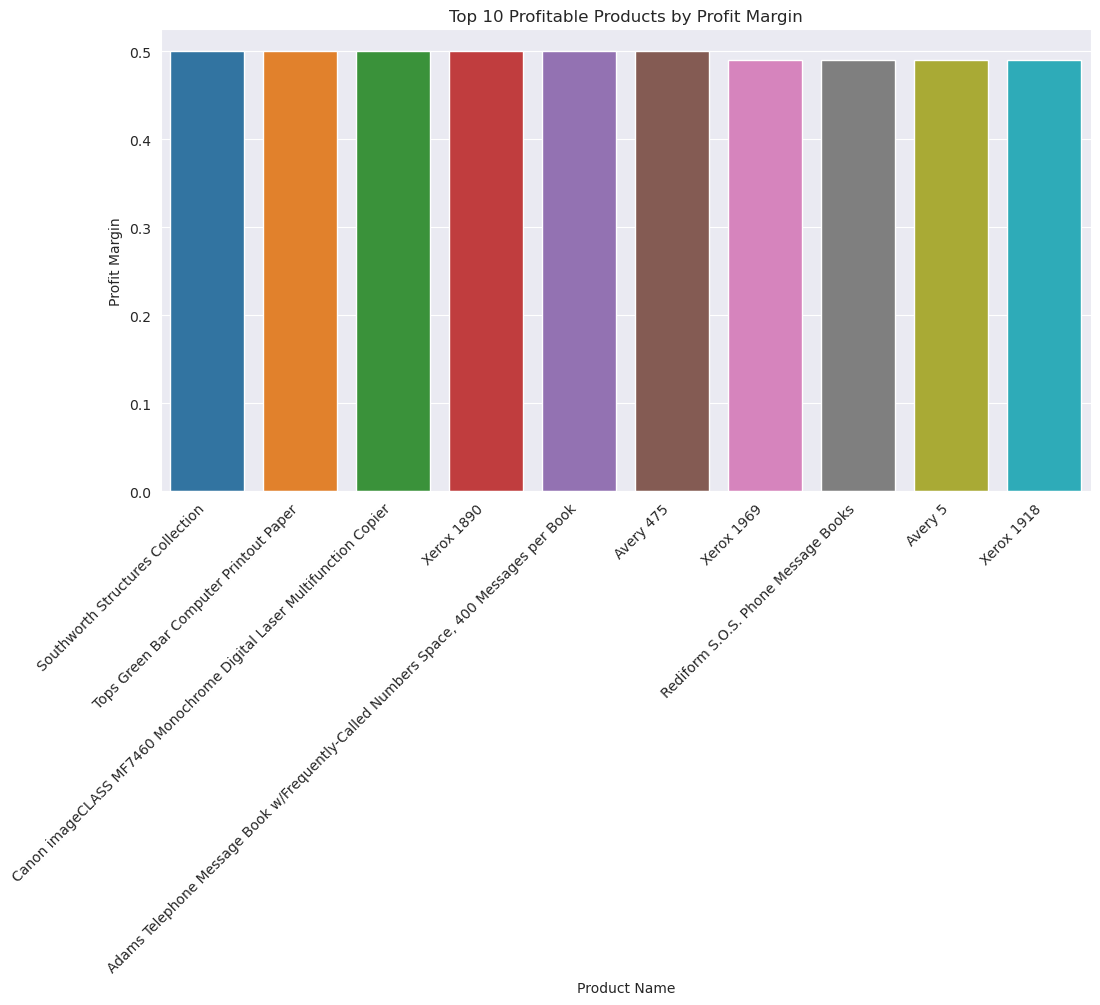

In [17]:
# Plot top profitable products

plt.figure(figsize=(12, 6))
sns.barplot(x=profitable_products.index, y=profitable_products.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Profitable Products by Profit Margin')
plt.xlabel('Product Name')
plt.ylabel('Profit Margin')
plt.show()

